In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')


In [3]:
nadia = cv2.imread('./DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('./DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('./DATA/solvay_conference.jpg',0)

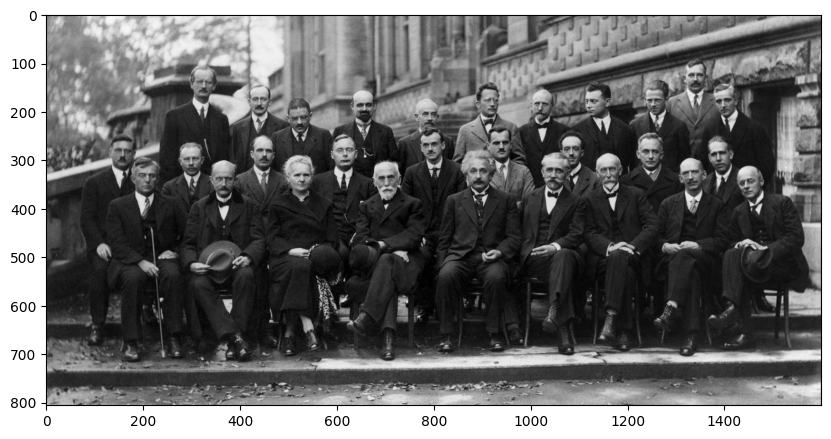

In [5]:
display(solvay)

In [7]:
face_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    
    face_rectangles = face_cascade.detectMultiScale(face_img)
    
    for (x, y, w, h) in face_rectangles:
        cv2.rectangle(face_img, (x,y), (x+w, y+h),(255,255,255), 10)
        
    return face_img

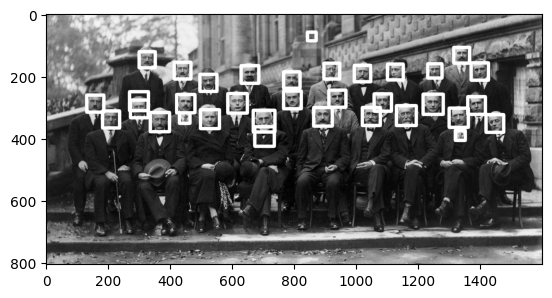

In [12]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [15]:
def adjusted_detect_face(img):
    face_img = img.copy()
    
    face_rectangles = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x, y, w, h) in face_rectangles:
        cv2.rectangle(face_img, (x,y), (x+w, y+h),(255,255,255), 10)
        
    return face_img

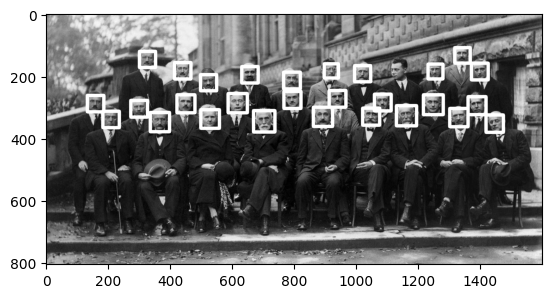

In [16]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [23]:
eye_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_eye.xml')

def detect_eyes(img):
    eye_img = img.copy()
    
    eyes_rectangles = eye_cascade.detectMultiScale(eye_img)
    
    for (x, y, w, h) in eyes_rectangles:
        cv2.rectangle(eye_img, (x,y), (x+w, y+h),(255,255,255), 10)
        
    return eye_img

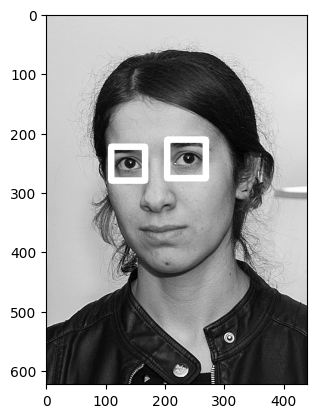

In [24]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

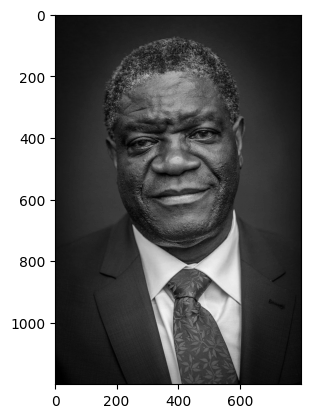

In [25]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')

In [26]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 